In [14]:
# @title Imports
from transformers import AutoModelForObjectDetection,AutoImageProcessor
import torch
from PIL import Image
import requests

In [36]:
# @title Global variables
device = "cuda" if torch.cuda.is_available() else "cpu"
checkpoint="facebook/detr-resnet-50"
url = "https://images.happypet.care/images/43359/ten-small-dog-breeds-for-first-time-pet-owners.webp"

In [37]:
# @title Loading Model,Image,Imageprocessor
model=AutoModelForObjectDetection.from_pretrained(checkpoint)
image = Image.open(requests.get(url, stream=True).raw)
imageprocessor=AutoImageProcessor.from_pretrained(checkpoint)

/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/module.py:2446: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

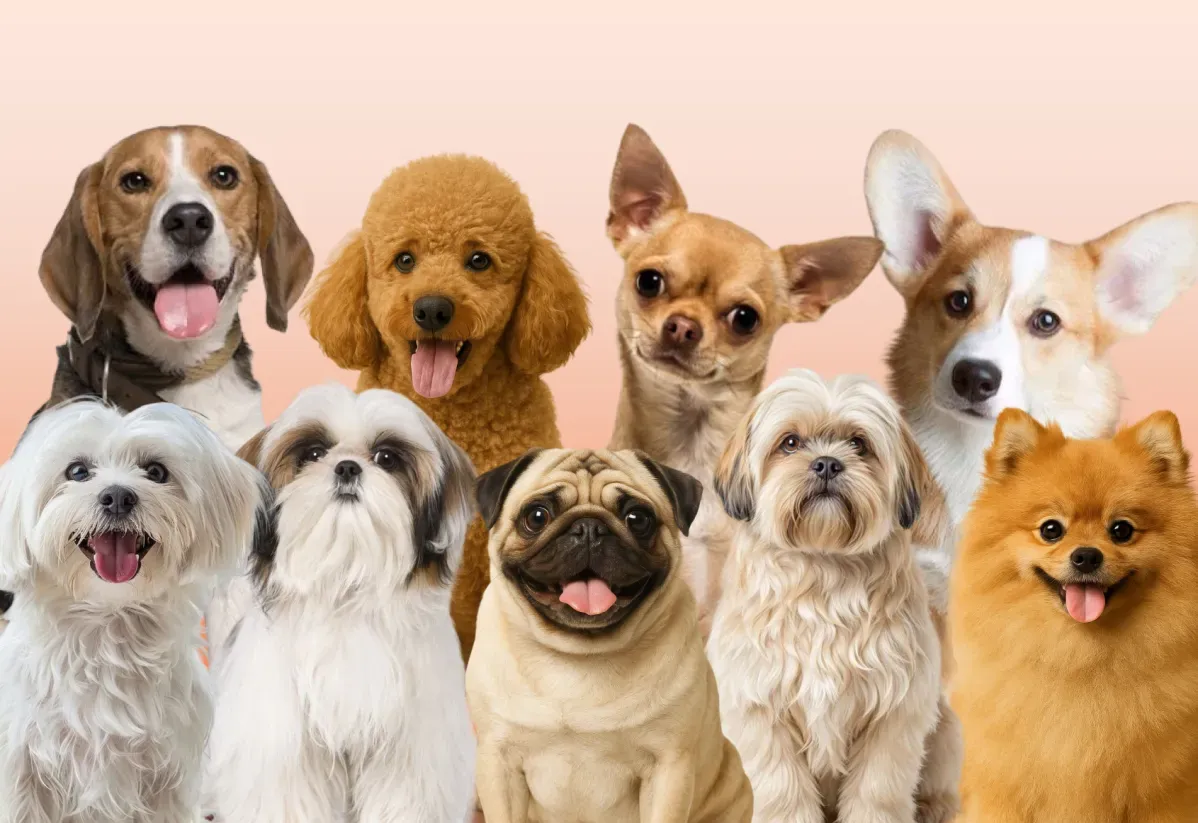

In [38]:
image

In [39]:
input=imageprocessor(image,return_tensors='pt')
input={k:v.to(device) for k,v in input.items()}
model=model.to(device)
out=model(**input)
results=imageprocessor.post_process_object_detection(out,target_sizes=torch.tensor([image.size[::-1]]), threshold=0.3)
for result in results:
    for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
        score, label = score.item(), label_id.item()
        box = [round(i, 2) for i in box.tolist()]
        print(f"{model.config.id2label[label]}: {score:.2f} {box}")

dog: 0.63 [0.5, 381.22, 479.38, 816.05]
dog: 0.98 [299.55, 154.8, 589.84, 477.47]
dog: 1.00 [1.07, 391.93, 272.21, 815.51]
dog: 1.00 [32.04, 129.72, 314.86, 459.98]
dog: 1.00 [209.58, 381.85, 484.52, 816.73]
dog: 0.86 [300.6, 155.5, 589.02, 648.29]
dog: 1.00 [936.73, 407.8, 1197.29, 814.75]
dog: 1.00 [602.85, 124.56, 886.76, 502.66]
dog: 0.99 [866.91, 129.1, 1197.15, 552.49]
dog: 1.00 [696.41, 368.73, 960.79, 816.31]
dog: 1.00 [458.64, 447.31, 754.73, 817.0]


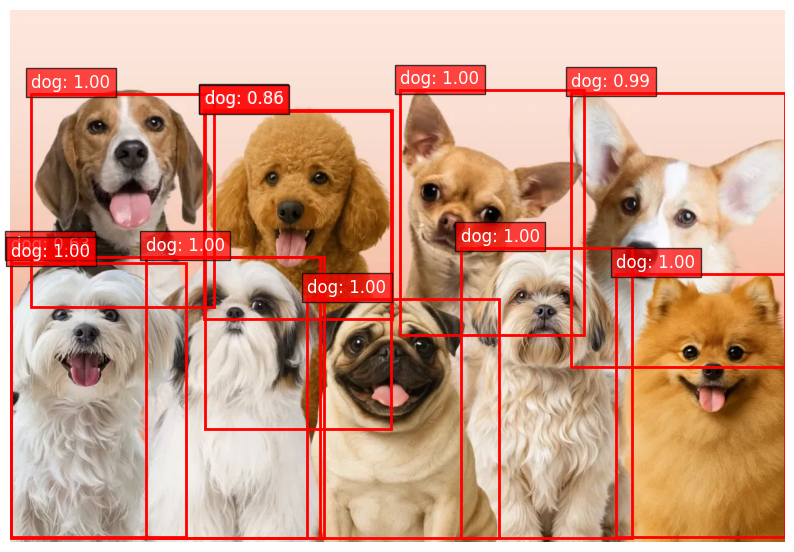

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(image)
ax=plt.gca()
for score, label_id, box in zip(result["scores"], result["labels"], result["boxes"]):
  x_min, y_min, x_max, y_max = box.tolist()
  ax.add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,fill=False,color='red',linewidth=2))
  class_name=model.config.id2label[label]
  ax.text(x_min, y_min - 10, f"{class_name}: {score:.2f}",color='white',fontsize=12,bbox=dict(facecolor='red',alpha=0.7))
plt.axis('off')
plt.show()